In [1]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
base_dir="/content/drive/MyDrive/TESS Toronto emotional speech set data"

In [3]:
class Feature_extraction:
    def __init__(self,base_dir):
        self.base_dir=base_dir


    def chroma_stft(self,y,sr):
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        chroma_stft_mean = np.mean(chroma_stft, axis=1)

    def fft(self,y):
        fft = np.fft.fft(y)
        fft_mean = np.mean(np.abs(fft))
    def mfccs(self,y,sr):
        mfccs = librosa.feature.mfcc(y=y, sr=sr)
        mfccs_mean = np.mean(mfccs, axis=1)

    def spectrogram(self,y):
        spectrogram = librosa.amplitude_to_db(librosa.stft(y))
        spectrogram_mean = np.mean(spectrogram, axis=1)

In [4]:
def extract_features(file_path):
    # Load audio file
    y, sr = librosa.load(file_path)

    # Extract features
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_stft_mean = np.mean(chroma_stft, axis=1)

    fft = np.fft.fft(y)
    fft_mean = np.mean(np.abs(fft))

    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    mfccs_mean = np.mean(mfccs, axis=1)

    spectrogram = librosa.amplitude_to_db(librosa.stft(y))
    spectrogram_mean = np.mean(spectrogram, axis=1)

    # Concatenate features
    features = np.concatenate((chroma_stft_mean, [fft_mean], mfccs_mean, spectrogram_mean))

    return  chroma_stft,fft_mean,mfccs_mean,spectrogram_mean

In [5]:
data =[]

In [6]:
for class_dir in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_dir)
    if os.path.isdir(class_path):
        # Loop through each audio file in the class directory
        for file_name in os.listdir(class_path):
            if file_name.endswith('.wav'):
                file_path = os.path.join(class_path, file_name)
                chroma_stft,fft_mean,mfccs_mean,spectrogram_mean = extract_features(file_path)
                # Combine the file name, class, and features into one row
                row = [file_name, class_dir, chroma_stft,fft_mean,mfccs_mean,spectrogram_mean]
                data.append(row)

<ipython-input-4-d9b3f246c7a3>:15: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spectrogram = librosa.amplitude_to_db(librosa.stft(y))


In [7]:
df=pd.DataFrame(data)

In [8]:
columns = ['file_name', 'class','chroma_stft_mean', 'fft_mean', 'mfccs_mean', 'spectrogram_mean']
df = pd.DataFrame(data, columns=columns)

In [9]:
df['class'] = df['class'].replace({'neutral':0, 'disgust':1,'Sad':2,'Pleasant_surprise':3, 'angry':4, 'Fear':5,
       'happy':6})

In [10]:
df.head()

,file_name,class,chroma_stft_mean,fft_mean,mfccs_mean,spectrogram_mean
0,OAF_bone_neutral.wav,0,"[[0.70837235, 0.63909024, 0.5806433, 0.8429316...",0.462370,"[-553.68207, 80.864075, 30.571594, 11.660842, ...","[-4.478693, -3.7557638, -7.090141, -12.916599,..."
1,OAF_cab_neutral.wav,0,"[[0.70526844, 0.69877344, 0.87605727, 1.0, 0.6...",0.740478,"[-486.98257, 68.429504, 9.547826, 5.421867, 10...","[-2.4587815, -2.6976843, -7.267186, -13.692887..."
2,OAF_burn_neutral.wav,0,"[[0.64291763, 0.8003275, 0.8071047, 0.6224545,...",0.775585,"[-520.45953, 88.72616, 27.15327, -2.330383, 12...","[-4.6953263, -2.4915283, -5.75424, -13.84924, ..."
3,OAF_back_neutral.wav,0,"[[0.982967, 0.94021726, 0.46934113, 0.5984927,...",0.620829,"[-527.84216, 86.38486, 13.286587, 1.9293745, 1...","[-2.863257, -1.7014165, -5.9772277, -12.304408..."
4,OAF_calm_neutral.wav,0,"[[0.5897416, 0.40905398, 1.0, 1.0, 1.0, 1.0, 1...",0.695976,"[-490.49863, 87.457146, 22.139296, -4.4882874,...","[-2.8133512, -3.5710316, -7.1035833, -15.19694..."


In [11]:
for col in ['mfccs_mean', 'chroma_stft_mean', 'spectrogram_mean']:
    df[col] = df[col].apply(lambda x: np.array(x).flatten())

In [12]:
max_length = max(len(arr) for arr in df['chroma_stft_mean'])

In [13]:
df_flattened = pd.concat([
    df.drop(['chroma_stft_mean', 'mfccs_mean', 'spectrogram_mean'], axis=1),
   pd.DataFrame(df['chroma_stft_mean'].tolist(), columns=[f'chroma_stft_mean_{i}' for i in range(max_length)]),
    pd.DataFrame(df['mfccs_mean'].tolist(), columns=[f'mfccs_mean_{i}' for i in range(len(df['mfccs_mean'].iloc[0]))]),
    pd.DataFrame(df['spectrogram_mean'].tolist(), columns=[f'spectrogram_mean_{i}' for i in range(len(df['spectrogram_mean'].iloc[0]))])
], axis=1)

In [14]:
df_flattened.isna().any(axis=1).sum()

2798

In [15]:
df_flattened.fillna(0, inplace=True)

In [16]:
df_flattened.isna().any(axis=1).sum()

0

In [17]:
df_flattened.head()

,file_name,class,fft_mean,chroma_stft_mean_0,chroma_stft_mean_1,chroma_stft_mean_2,chroma_stft_mean_3,chroma_stft_mean_4,chroma_stft_mean_5,chroma_stft_mean_6,...,spectrogram_mean_1015,spectrogram_mean_1016,spectrogram_mean_1017,spectrogram_mean_1018,spectrogram_mean_1019,spectrogram_mean_1020,spectrogram_mean_1021,spectrogram_mean_1022,spectrogram_mean_1023,spectrogram_mean_1024
0,OAF_bone_neutral.wav,0,0.462370,0.708372,0.639090,0.580643,0.842932,0.958821,0.966180,0.472478,...,-56.975636,-56.975636,-56.975636,-56.975636,-56.975636,-56.975636,-56.975636,-56.975636,-56.975636,-56.975636
1,OAF_cab_neutral.wav,0,0.740478,0.705268,0.698773,0.876057,1.000000,0.689523,0.622932,0.670706,...,-57.087685,-57.087685,-57.087685,-57.087685,-57.087685,-57.087685,-57.087685,-57.087685,-57.087685,-57.087685
2,OAF_burn_neutral.wav,0,0.775585,0.642918,0.800327,0.807105,0.622455,0.437857,0.658408,0.875171,...,-54.418442,-54.418442,-54.418442,-54.418442,-54.418442,-54.418442,-54.418442,-54.418442,-54.418442,-54.418442
3,OAF_back_neutral.wav,0,0.620829,0.982967,0.940217,0.469341,0.598493,0.401380,0.327679,0.278528,...,-57.137993,-57.137993,-57.137993,-57.137993,-57.137993,-57.137993,-57.137993,-57.137993,-57.137993,-57.137993
4,OAF_calm_neutral.wav,0,0.695976,0.589742,0.409054,1.000000,1.000000,1.000000,1.000000,1.000000,...,-54.482964,-54.482964,-54.482964,-54.482964,-54.482964,-54.482964,-54.482964,-54.482964,-54.482964,-54.482964


In [18]:
df=df_flattened

In [19]:
df.to_csv('data.csv')

In [20]:
df_flattened.to_csv('data_flattened.csv')

In [21]:
df['class'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [22]:
y = df['class']

In [23]:
df_flattened.drop(columns=['file_name'], inplace=True)

In [24]:
X = df_flattened.drop(columns=['class'])

In [25]:
X.head()

,fft_mean,chroma_stft_mean_0,chroma_stft_mean_1,chroma_stft_mean_2,chroma_stft_mean_3,chroma_stft_mean_4,chroma_stft_mean_5,chroma_stft_mean_6,chroma_stft_mean_7,chroma_stft_mean_8,...,spectrogram_mean_1015,spectrogram_mean_1016,spectrogram_mean_1017,spectrogram_mean_1018,spectrogram_mean_1019,spectrogram_mean_1020,spectrogram_mean_1021,spectrogram_mean_1022,spectrogram_mean_1023,spectrogram_mean_1024
0,0.462370,0.708372,0.639090,0.580643,0.842932,0.958821,0.966180,0.472478,0.319310,0.672414,...,-56.975636,-56.975636,-56.975636,-56.975636,-56.975636,-56.975636,-56.975636,-56.975636,-56.975636,-56.975636
1,0.740478,0.705268,0.698773,0.876057,1.000000,0.689523,0.622932,0.670706,0.711864,0.602917,...,-57.087685,-57.087685,-57.087685,-57.087685,-57.087685,-57.087685,-57.087685,-57.087685,-57.087685,-57.087685
2,0.775585,0.642918,0.800327,0.807105,0.622455,0.437857,0.658408,0.875171,0.996516,0.892908,...,-54.418442,-54.418442,-54.418442,-54.418442,-54.418442,-54.418442,-54.418442,-54.418442,-54.418442,-54.418442
3,0.620829,0.982967,0.940217,0.469341,0.598493,0.401380,0.327679,0.278528,0.470382,0.656918,...,-57.137993,-57.137993,-57.137993,-57.137993,-57.137993,-57.137993,-57.137993,-57.137993,-57.137993,-57.137993
4,0.695976,0.589742,0.409054,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-54.482964,-54.482964,-54.482964,-54.482964,-54.482964,-54.482964,-54.482964,-54.482964,-54.482964,-54.482964


In [26]:
X.isna().any(axis=1).sum()

0

In [27]:
X.fillna(0)

,fft_mean,chroma_stft_mean_0,chroma_stft_mean_1,chroma_stft_mean_2,chroma_stft_mean_3,chroma_stft_mean_4,chroma_stft_mean_5,chroma_stft_mean_6,chroma_stft_mean_7,chroma_stft_mean_8,...,spectrogram_mean_1015,spectrogram_mean_1016,spectrogram_mean_1017,spectrogram_mean_1018,spectrogram_mean_1019,spectrogram_mean_1020,spectrogram_mean_1021,spectrogram_mean_1022,spectrogram_mean_1023,spectrogram_mean_1024
0,0.462370,0.708372,0.639090,0.580643,0.842932,0.958821,0.966180,0.472478,0.319310,0.672414,...,-56.975636,-56.975636,-56.975636,-56.975636,-56.975636,-56.975636,-56.975636,-56.975636,-56.975636,-56.975636
1,0.740478,0.705268,0.698773,0.876057,1.000000,0.689523,0.622932,0.670706,0.711864,0.602917,...,-57.087685,-57.087685,-57.087685,-57.087685,-57.087685,-57.087685,-57.087685,-57.087685,-57.087685,-57.087685
2,0.775585,0.642918,0.800327,0.807105,0.622455,0.437857,0.658408,0.875171,0.996516,0.892908,...,-54.418442,-54.418442,-54.418442,-54.418442,-54.418442,-54.418442,-54.418442,-54.418442,-54.418442,-54.418442
3,0.620829,0.982967,0.940217,0.469341,0.598493,0.401380,0.327679,0.278528,0.470382,0.656918,...,-57.137993,-57.137993,-57.137993,-57.137993,-57.137993,-57.137993,-57.137993,-57.137993,-57.137993,-57.137993
4,0.695976,0.589742,0.409054,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-54.482964,-54.482964,-54.482964,-54.482964,-54.482964,-54.482964,-54.482964,-54.482964,-54.482964,-54.482964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,8.807288,1.000000,0.668546,0.461969,0.185645,0.255652,0.441924,0.689676,0.395363,0.219269,...,-40.328842,-40.328842,-40.328842,-40.328842,-40.328842,-40.328842,-40.328842,-40.328842,-40.328842,-40.328842
2796,4.879049,0.858499,1.000000,0.916901,0.999257,0.933714,0.461406,0.264489,0.223747,0.418926,...,-41.705063,-41.705063,-41.705063,-41.705063,-41.705063,-41.705063,-41.705063,-41.705063,-41.705063,-41.705063
2797,9.244031,1.000000,0.816626,0.253200,0.291782,0.563131,0.409206,0.201171,0.181016,0.194243,...,-37.900078,-37.900078,-37.900078,-37.900078,-37.900078,-37.900078,-37.900078,-37.900078,-37.900078,-37.900078
2798,8.690214,0.948909,0.435037,0.146424,0.210119,0.444922,0.221016,0.237108,0.216937,0.089651,...,-37.098801,-37.098801,-37.098801,-37.098801,-37.098801,-37.098801,-37.098801,-37.098801,-37.098801,-37.098801


In [28]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.svm import SVC

In [31]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [32]:
classifiers={
    'RandomForestClassifier':RandomForestClassifier(),
    'GaussianNB':GaussianNB(),
    'LogisticRegression':LogisticRegression(),
    'SVM-sigmoid':SVC(kernel='sigmoid'),
    'SVM-rbf':SVC(kernel='rbf'),
    'SVM-linear':SVC(kernel='linear'),
     'LGBMClassifier':LGBMClassifier(),
     'XGBClassifier':XGBClassifier(),
     'GradientBoostingClassifier':GradientBoostingClassifier()
}

In [33]:
from matplotlib import pyplot as plt

In [34]:
X.head()

,fft_mean,chroma_stft_mean_0,chroma_stft_mean_1,chroma_stft_mean_2,chroma_stft_mean_3,chroma_stft_mean_4,chroma_stft_mean_5,chroma_stft_mean_6,chroma_stft_mean_7,chroma_stft_mean_8,...,spectrogram_mean_1015,spectrogram_mean_1016,spectrogram_mean_1017,spectrogram_mean_1018,spectrogram_mean_1019,spectrogram_mean_1020,spectrogram_mean_1021,spectrogram_mean_1022,spectrogram_mean_1023,spectrogram_mean_1024
0,0.462370,0.708372,0.639090,0.580643,0.842932,0.958821,0.966180,0.472478,0.319310,0.672414,...,-56.975636,-56.975636,-56.975636,-56.975636,-56.975636,-56.975636,-56.975636,-56.975636,-56.975636,-56.975636
1,0.740478,0.705268,0.698773,0.876057,1.000000,0.689523,0.622932,0.670706,0.711864,0.602917,...,-57.087685,-57.087685,-57.087685,-57.087685,-57.087685,-57.087685,-57.087685,-57.087685,-57.087685,-57.087685
2,0.775585,0.642918,0.800327,0.807105,0.622455,0.437857,0.658408,0.875171,0.996516,0.892908,...,-54.418442,-54.418442,-54.418442,-54.418442,-54.418442,-54.418442,-54.418442,-54.418442,-54.418442,-54.418442
3,0.620829,0.982967,0.940217,0.469341,0.598493,0.401380,0.327679,0.278528,0.470382,0.656918,...,-57.137993,-57.137993,-57.137993,-57.137993,-57.137993,-57.137993,-57.137993,-57.137993,-57.137993,-57.137993
4,0.695976,0.589742,0.409054,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-54.482964,-54.482964,-54.482964,-54.482964,-54.482964,-54.482964,-54.482964,-54.482964,-54.482964,-54.482964


In [35]:
X.isna().any(axis=1).sum()

0

Training and Evaluating RandomForestClassifier
RandomForestClassifierAccuracy: 0.9625
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       0.93      0.94      0.94        89
           2       1.00      0.99      0.99        77
           3       0.89      0.88      0.89        86
           4       1.00      0.97      0.99        76
           5       0.99      1.00      0.99        83
           6       0.95      0.96      0.95        73

    accuracy                           0.96       560
   macro avg       0.96      0.96      0.96       560
weighted avg       0.96      0.96      0.96       560



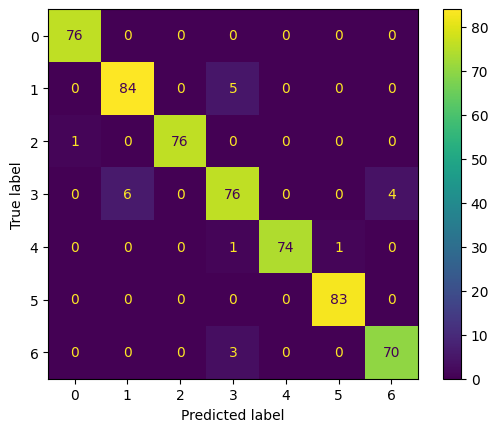

Training and Evaluating GaussianNB
GaussianNBAccuracy: 0.5446428571428571
              precision    recall  f1-score   support

           0       0.64      0.86      0.73        76
           1       0.88      0.72      0.79        89
           2       0.89      0.40      0.55        77
           3       0.38      0.21      0.27        86
           4       0.51      0.25      0.34        76
           5       0.42      0.99      0.59        83
           6       0.36      0.36      0.36        73

    accuracy                           0.54       560
   macro avg       0.58      0.54      0.52       560
weighted avg       0.58      0.54      0.52       560



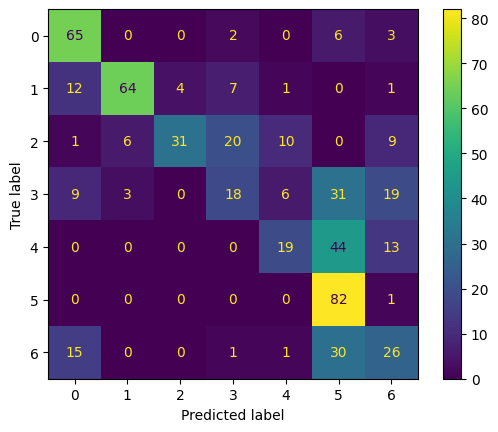

Training and Evaluating LogisticRegression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegressionAccuracy: 0.9910714285714286
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       0.99      0.99      0.99        89
           2       0.99      1.00      0.99        77
           3       1.00      0.99      0.99        86
           4       1.00      0.96      0.98        76
           5       0.98      1.00      0.99        83
           6       1.00      1.00      1.00        73

    accuracy                           0.99       560
   macro avg       0.99      0.99      0.99       560
weighted avg       0.99      0.99      0.99       560



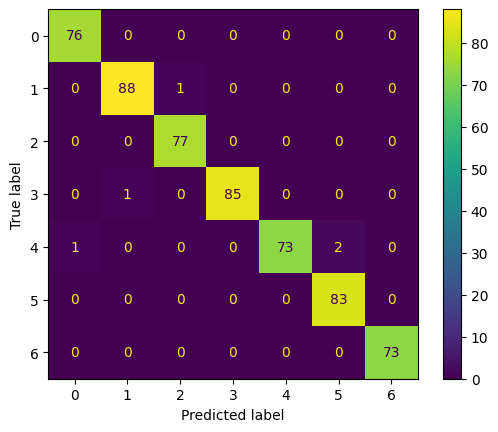

Training and Evaluating SVM-sigmoid
SVM-sigmoidAccuracy: 0.0875
              precision    recall  f1-score   support

           0       0.14      0.09      0.11        76
           1       0.00      0.00      0.00        89
           2       0.15      0.45      0.23        77
           3       0.00      0.00      0.00        86
           4       0.03      0.09      0.04        76
           5       0.00      0.00      0.00        83
           6       0.00      0.00      0.00        73

    accuracy                           0.09       560
   macro avg       0.04      0.09      0.05       560
weighted avg       0.04      0.09      0.05       560



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


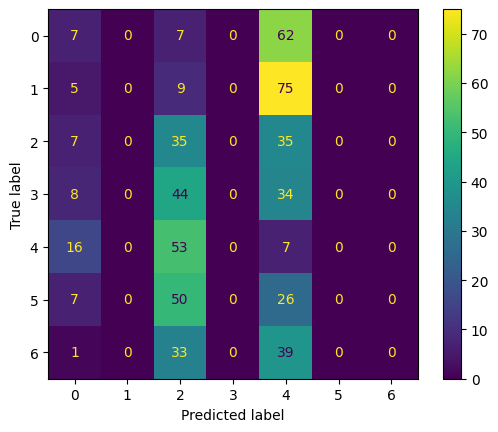

Training and Evaluating SVM-rbf
SVM-rbfAccuracy: 0.9339285714285714
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       0.83      0.94      0.88        89
           2       1.00      1.00      1.00        77
           3       0.84      0.83      0.83        86
           4       0.96      0.97      0.97        76
           5       0.99      0.99      0.99        83
           6       0.97      0.81      0.88        73

    accuracy                           0.93       560
   macro avg       0.94      0.93      0.94       560
weighted avg       0.94      0.93      0.93       560



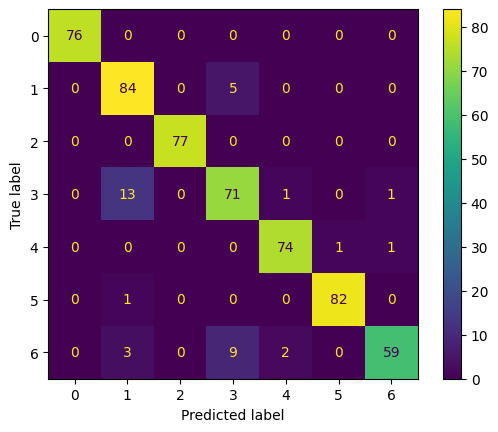

Training and Evaluating SVM-linear
SVM-linearAccuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        89
           2       1.00      1.00      1.00        77
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        76
           5       1.00      1.00      1.00        83
           6       1.00      1.00      1.00        73

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560



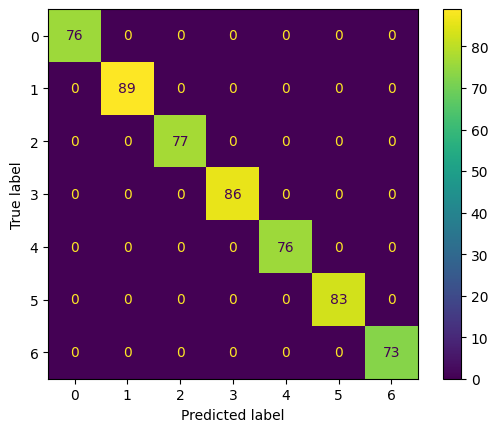

Training and Evaluating LGBMClassifier
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.173459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 585706
[LightGBM] [Info] Number of data points in the train set: 2240, number of used features: 2486
[LightGBM] [Info] Start training from score -1.933488
[LightGBM] [Info] Start training from score -1.974438
[LightGBM] [Info] Start training from score -1.936579
[LightGBM] [Info] Start training from score -1.964838
[LightGBM] [Info] Start training from score -1.933488
[LightGBM] [Info] Start training from score -1.955329
[LightGBM] [Info] Start training from score -1.924271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

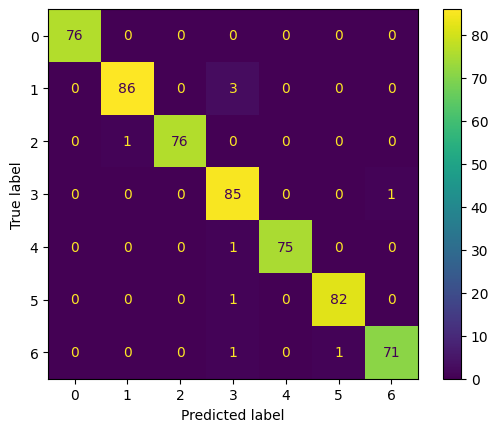

Training and Evaluating XGBClassifier
XGBClassifierAccuracy: 0.9875
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        89
           2       1.00      1.00      1.00        77
           3       0.95      0.98      0.97        86
           4       1.00      0.99      0.99        76
           5       0.99      0.99      0.99        83
           6       0.97      0.96      0.97        73

    accuracy                           0.99       560
   macro avg       0.99      0.99      0.99       560
weighted avg       0.99      0.99      0.99       560



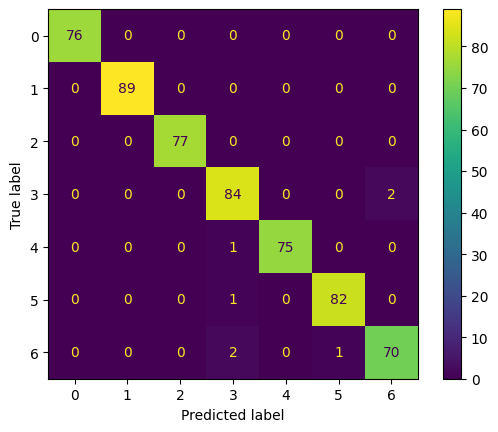

Training and Evaluating GradientBoostingClassifier
GradientBoostingClassifierAccuracy: 0.9892857142857143
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       0.98      0.99      0.98        89
           2       1.00      0.99      0.99        77
           3       0.96      0.99      0.97        86
           4       1.00      0.99      0.99        76
           5       1.00      0.99      0.99        83
           6       1.00      0.99      0.99        73

    accuracy                           0.99       560
   macro avg       0.99      0.99      0.99       560
weighted avg       0.99      0.99      0.99       560



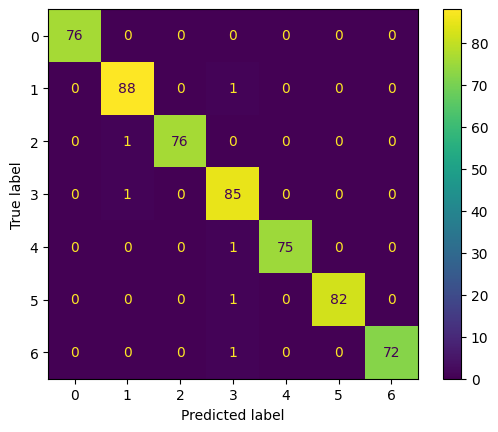

In [36]:
for clf_name,clf in classifiers.items():
  print(f"Training and Evaluating {clf_name}")
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  print(f"{clf_name}Accuracy: {accuracy_score(y_test,y_pred)}")
  print(classification_report(y_test,y_pred))
  cm=confusion_matrix(y_test,y_pred)
  disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
  disp.plot()
  plt.show()